# Part 00 - Planning & Preparing Data

In [2]:
# !pip install -U dojo_ds -q
# import dojo_ds as ds
# ds.__version__

## Setting Filepaths Config Files

>- Filepath to-dos:
>    - Add names of model insights figures to FPATHS     

In [1]:
## Importing custom function for project
# !pip install -U dojo_ds -q 
import dojo_ds as fn
import os,glob,json
from pprint import pprint
import pandas as pd
pd.set_option("display.max_columns",200)

import json, os
from pprint import pprint

# Define filename for project config filepaths json file
FPATHS_FILE = "config/filepaths.json"
os.makedirs(os.path.dirname(FPATHS_FILE), exist_ok=True)

# Define Filepaths
FPATHS = dict(
    data={
        "raw": {
            'large-metadata': "data/raw/meta_Grocery_and_Gourmet_Food.json.gz",
            'large-reviews':'data/raw/Grocery_and_Gourmet_Food.json.gz',
            # Smaller split raw data files from original .json.gz files
            'split-metadata_dict': {'dir': "data/raw-split/",
                                    'glob':"data/raw-split/*meta*part*"
                                   },
            'split-reviews_dict': {"dir":'data/raw-split/',
                                   'glob': "data/raw-split/*review*part*"
                                  },
            },
        'cleaned': {
            'reviews-by-years_dict':{'dir':'data/reviews-by-year/',
                                     "glob":'data/reviews-by-year/*.*'
                                    },
            "metadata_csv-gz":"data/metadata/amazon-metadata-groceries-combined.csv.gz",
            'asin-id-title-dict_json': "data/metadata/amazon-groceries-asin-titles-lookup.json"
        },
        "subset":{
            'reviews-subset_most-commonly-reviewed_csv':'data/subset/amazon-reviews-subset-grocery-most-common-products.csv.gz',
            # Brand subset
            "reviews-subset_selected-brand_csv":"data/subset/amazon-reviews-subset-brand-Miracle Noodle.csv",
            "metadata_csv":'data/subset/amazon-metadata-subset-grocery-most-common-products.csv.gz',

        },
        "processed-nlp":{
            # "processed-reviews-spacy_csv":"data/processed/processed-reviews.csv",
            "processed-reviews-spacy_json":"data/processed/processed-reviews.json",
            "processed-reviews-spacy_joblib": "data/processed/processed-reviews.joblib",
             "processed-reviews-with-target_json": "data/processed/processed-reviews-with-target.json",
            'processed-reviews-with-target_joblib':"data/processed/processed-reviews-with-target.joblib",
            # "processed-reviews-spacy_json": "Data-NLP/processed-nlp-reviews.json",
        },
        "app": {
            'product-metadata_json':'data/metadata/amazon-metadata_selected-asins-only.json',
             'reviews-with-target-for-llm_csv': "app-assets/reviews-for-llm.csv",
            'vector-db_dir':'./app-assets/reviews_db/',

        },
        "ml-nlp": {
            # Final dataframe of machine learning for NLP ( Use Data-NLP Folder for these models)
            # "reviews-with-target_json": "data/modeling/processed-nlp-reviews-for-ml.json",
            "train_joblib": "data/modeling/training-data.joblib",  # (X_train,y_train)
            "test_joblib": "data/modeling/testing-data.joblib",  # (X_test,y_test)
        },

        "nn-nlp": {
            "train_dir": "data/modeling/training-data-tf/",  # train_ds
            "val_dir":'data/modeling/validation-data-tf/',
            "test_dir": "data/modeling/testing-data-tf/",  # test_ds
        },
    },
    images={
        "banner_png": "images/banners/DALLE-banner-03-central-brain-outer-icons.png",
        'selected-product_jpg':'images/selected-products/miracle-noodle-2024.jpg'
    },
    # # Additional metadata (target lookup,etc.)
    metadata={
        "target_lookup_json": "data/metadata/target-lookup.json",
        'label_encoder_joblib':'data/metadata/label-encoder.joblib',
        "product-information_md":"app-assets/product-infromation.md",
    },
    # Any images to be displayed in the app
    eda={
        "wordclouds":{
            "default-clouds-by-group_png": "eda/default-wordclouds.png",
            "bigram-clouds-by-group_png":"eda/bigram-wordclouds.png",
            'trigram-clouds-by-group_png':"eda/trigram-wordclouds.png"
        },
        "scattertext-by-group_html": "eda/scattertext.html",
        
        "bigrams":{
            "ngram-table_md": "eda/bigrams-table.md",
            "ngram-fig_png": "eda/bigrams-plot.png"
        },
        "trigrams":{
            "ngram-table_md": "eda/trigrams-table.md",
            "ngram-fig_png": "eda/trigrams-plot.png"
        },        
        "quadgrams":{
            "ngram-table_md": "eda/quadgrams-table.md",
            "ngram-fig_png": "eda/quadgrams-plot.png"
        },        
    },
    models={
        # Machine Learning Models and results
        "ml": {
            "bayes_joblib": "models/bayes-clf.joblib",
            "random_forest_joblib": "models/random-forest.joblib",
            "logreg_joblib": "models/log-reg.joblib",
        },
        # Neural networks and results
        "nn": {
            "LSTM_dir": "models/keras/lstm/",
            "GRU_dir": "models/keras/gru/",
            "Attention_model_dir": "models/keras/attn/",
        },
    },
    results = {"best-ml-clf_joblib":"models/best-ml-clf.joblib",
             'best-network':"models/keras/best-network/",
              'review-summary-01_json':"app-assets/review-summary-bart-01.json",
               'review-summary-02_json':"app-assets/review-summary-bart-02.json"
              },
    readme = {'histogram-reviews-dist_png': "images/01_histogram_reviews.png",
             'avg-reviews-by-year_png':'images/02_avg_rating_by_year.png',
             'number-reviews-stars-by-year_png':'images/03_count_stars_by_year.png',
             'ngrams-by-group_png':'images/04_ngrams_by_group.png',
             'wordclouds-by-group_png':'images/05_wordclouds.png'},
    
)
# Use fn for local package, ds for pip version
fn.utils.create_directories_from_paths(FPATHS)
# ds.utils.create_directories_from_paths(FPATHS)

print('[i] FPATHS Dictionary:\n')
pprint(FPATHS)

## Save the filepaths
with open(FPATHS_FILE, "w") as f:
    json.dump(FPATHS, f)
    print(f"\n[i] Saved FPATHS to {FPATHS_FILE}")

[i] FPATHS Dictionary:

{'data': {'app': {'product-metadata_json': 'data/metadata/amazon-metadata_selected-asins-only.json',
                  'reviews-with-target-for-llm_csv': 'app-assets/reviews-for-llm.csv',
                  'vector-db_dir': './app-assets/reviews_db/'},
          'cleaned': {'asin-id-title-dict_json': 'data/metadata/amazon-groceries-asin-titles-lookup.json',
                      'metadata_csv-gz': 'data/metadata/amazon-metadata-groceries-combined.csv.gz',
                      'reviews-by-years_dict': {'dir': 'data/reviews-by-year/',
                                                'glob': 'data/reviews-by-year/*.*'}},
          'ml-nlp': {'test_joblib': 'data/modeling/testing-data.joblib',
                     'train_joblib': 'data/modeling/training-data.joblib'},
          'nn-nlp': {'test_dir': 'data/modeling/testing-data-tf/',
                     'train_dir': 'data/modeling/training-data-tf/',
                     'val_dir': 'data/modeling/validation-data-tf/

In [2]:
with open(FPATHS_FILE) as f:
    TEST = json.load(f)
# pprint(TEST)
TEST

{'data': {'raw': {'large-metadata': 'data/raw/meta_Grocery_and_Gourmet_Food.json.gz',
   'large-reviews': 'data/raw/Grocery_and_Gourmet_Food.json.gz',
   'split-metadata_dict': {'dir': 'data/raw-split/',
    'glob': 'data/raw-split/*meta*part*'},
   'split-reviews_dict': {'dir': 'data/raw-split/',
    'glob': 'data/raw-split/*review*part*'}},
  'cleaned': {'reviews-by-years_dict': {'dir': 'data/reviews-by-year/',
    'glob': 'data/reviews-by-year/*.*'},
   'metadata_csv-gz': 'data/metadata/amazon-metadata-groceries-combined.csv.gz',
   'asin-id-title-dict_json': 'data/metadata/amazon-groceries-asin-titles-lookup.json'},
  'subset': {'reviews-subset_most-commonly-reviewed_csv': 'data/subset/amazon-reviews-subset-grocery-most-common-products.csv.gz',
   'reviews-subset_selected-brand_csv': 'data/subset/amazon-reviews-subset-brand-Miracle Noodle.csv',
   'metadata_csv': 'data/subset/amazon-metadata-subset-grocery-most-common-products.csv.gz'},
  'processed-nlp': {'processed-reviews-spacy_

In [21]:
TEST['data'].keys()

dict_keys(['raw', 'cleaned', 'subset', 'processed-nlp', 'app', 'ml-nlp', 'nn-nlp'])

In [22]:
TEST['images']

{'banner_png': 'images/banners/DALLE-banner-03-central-brain-outer-icons.png',
 'selected-product_jpg': 'images/selected-products/miracle-noodle-2024.jpg'}

In [8]:
TEST['data']['raw']

{'large-metadata': 'data/raw/meta_Grocery_and_Gourmet_Food.json.gz',
 'large-reviews': 'data/raw/Grocery_and_Gourmet_Food.json.gz',
 'split-metadata_dict': {'dir': 'data/raw-split/',
  'glob': 'data/raw-split/*meta*part*'},
 'split-reviews_dict': {'dir': 'data/raw-split/',
  'glob': 'data/raw-split/*review*part*'}}

## Project Panner Processing

In [13]:
import glob
from PIL import Image

webp_files = sorted(glob.glob("images/banners/*.webp"))
webp_files

['images/banners/DALLE-banner-01-head.webp',
 'images/banners/DALLE-banner-02-central-brain.webp',
 'images/banners/DALLE-banner-03-central-brain-outer-icons.webp']

In [14]:
for fname in webp_files:
    img = Image.open(fname)
    fname_out =fname.replace('.webp','.png')
    img.save(fname_out,"png")

In [15]:
png_files = sorted(glob.glob("images/banners/*.png"))
png_files

['images/banners/DALLE-banner-01-head.png',
 'images/banners/DALLE-banner-02-central-brain.png',
 'images/banners/DALLE-banner-03-central-brain-outer-icons.png']

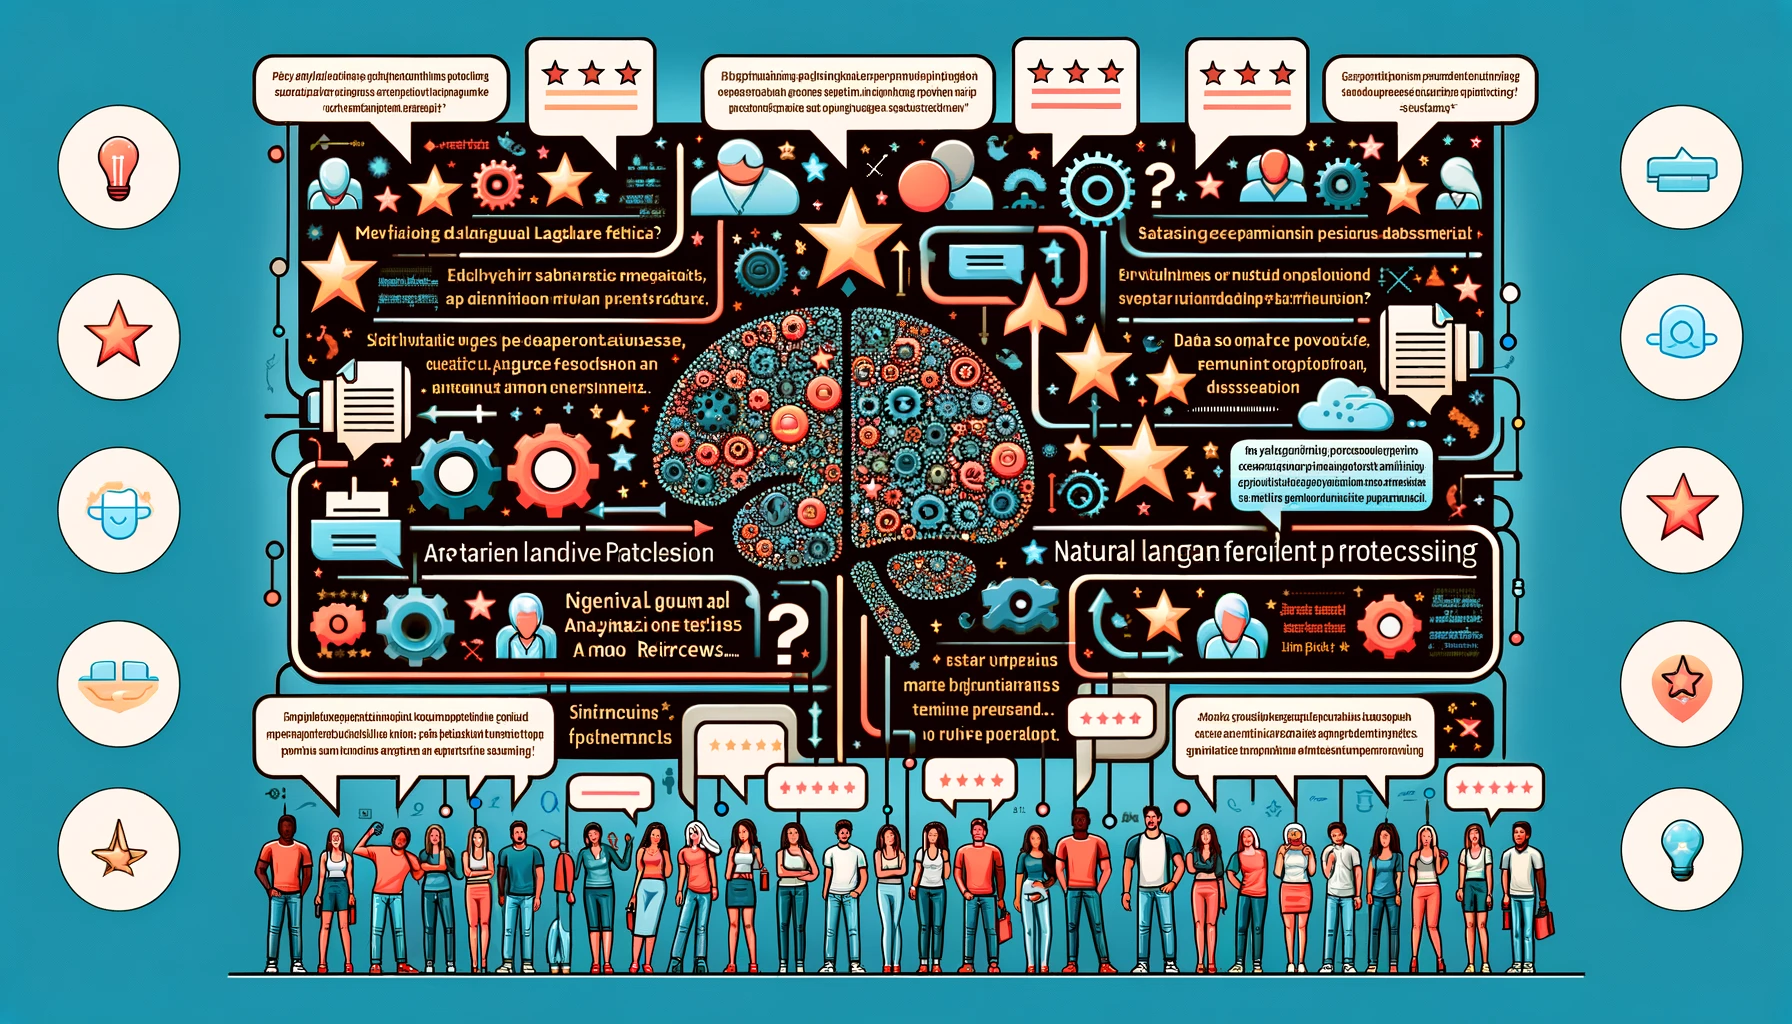

In [18]:
Image.open(png_files[2])

## Notebook Order of Operations

- Part-00_Planning & Preparing Project Data.ipynb
    - Define config/filepaths.json
        - Update as needed when working on other parts of the project. 
- Part-01_Splitting Large Raw Amazon Reviews & Metadata.ipynb:
    - Process raw .json.gz of reviews and metadata and split into small files for storage in repo.